In [11]:
import  numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [12]:
df = pd.read_csv('insurance.csv')

In [13]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
df.shape

(1338, 7)

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
numeric_df = ['age', 'bmi', 'children', 'charges']

In [21]:
numeric_df

['age', 'bmi', 'children', 'charges']

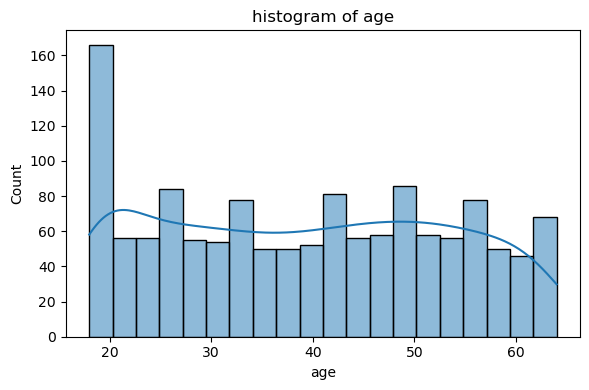

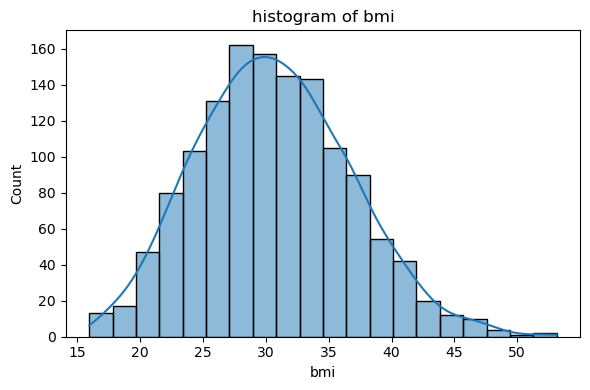

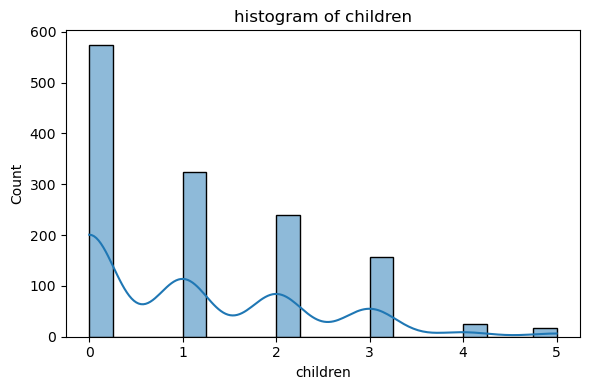

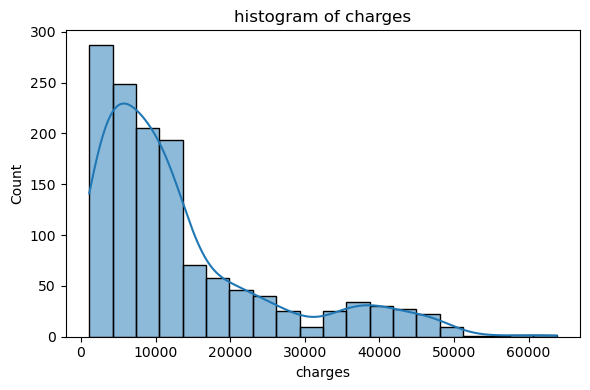

In [22]:
for col in numeric_df:
    plt.figure(figsize = (6,4))
    sns.histplot(df[col] , kde = True , bins = 20)
    plt.title(f'histogram of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()
    

<Axes: xlabel='children', ylabel='count'>

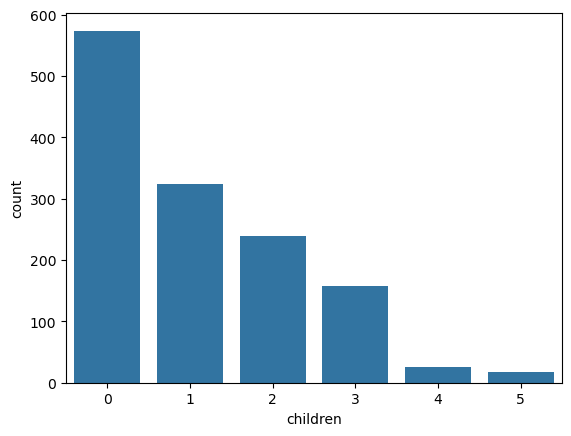

In [23]:
sns.countplot( x = df['children'])

<Axes: xlabel='sex', ylabel='count'>

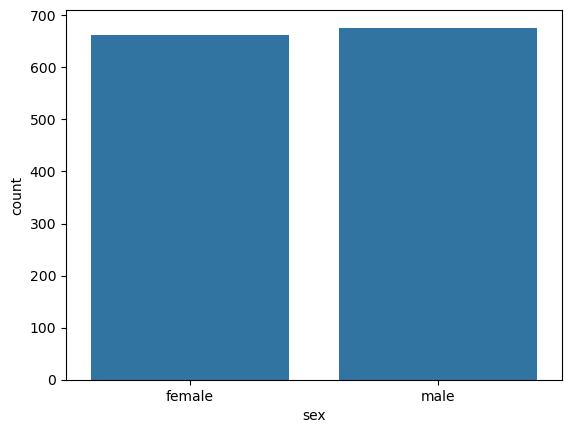

In [24]:
sns.countplot(x = df['sex'])

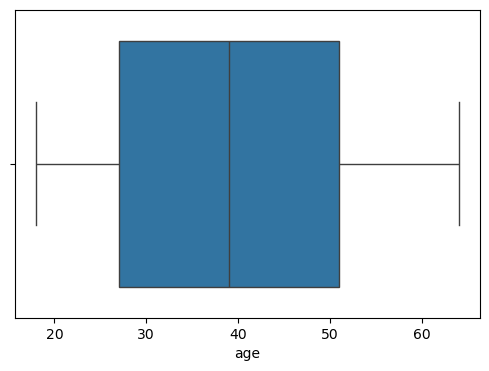

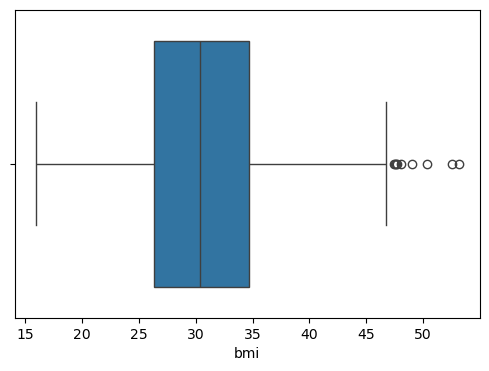

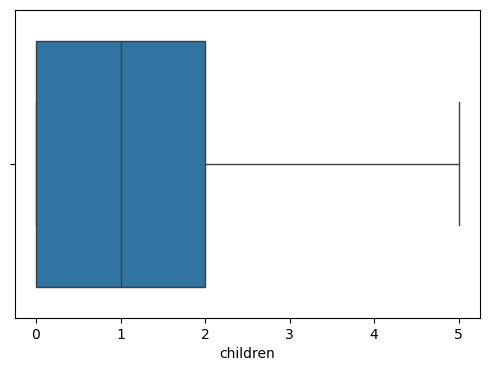

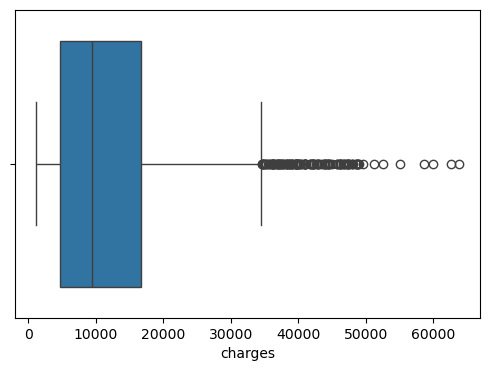

In [25]:
for col in numeric_df:
    plt.figure(figsize = (6,4))
    sns.boxplot(x = df[col])

<Axes: >

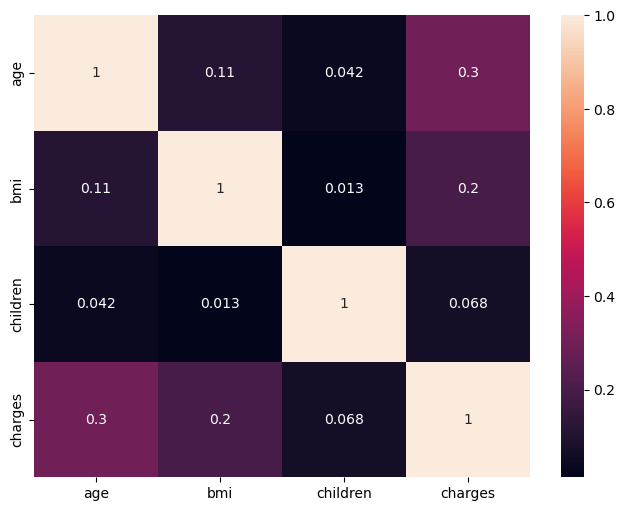

In [26]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [27]:
df_cleaned = df.copy()

In [28]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
type(df_cleaned)

pandas.core.frame.DataFrame

In [30]:
df_cleaned.drop_duplicates(inplace = True)

In [31]:
df_cleaned.shape

(1337, 7)

In [32]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [33]:
df_cleaned["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [34]:
df_cleaned['sex'] = df_cleaned["sex"].map({
    "male": 0,
    "female": 1
})

In [35]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [36]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [37]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({
    'no':0,
    'yes':1
})

In [38]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [39]:
df_cleaned.rename(columns = {
    'sex': 'is_female',
    'smoker':'is_smoker'
}, inplace = True)

In [40]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [41]:
df_cleaned = pd.get_dummies (df_cleaned , columns = ['region'], drop_first = True)

In [42]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [43]:
df_cleaned = df_cleaned.astype(int)

In [44]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


<Axes: xlabel='bmi', ylabel='Count'>

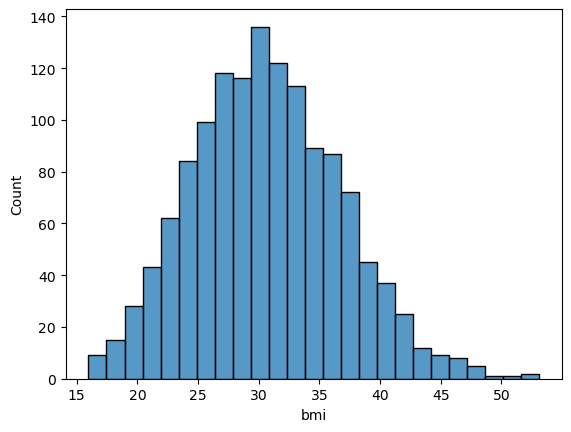

In [45]:
sns.histplot(df['bmi'])

In [46]:
df_cleaned['bmi_catogary'] = pd.cut(
    df_cleaned['bmi'],
    bins = [0, 18.5, 24.9, 29.9, float('inf')], 
    labels = ["under_weight", "normal", "over_weight", "obes"]
    
)


In [47]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_catogary
0,19,1,27,0,1,16884,0,0,1,over_weight
1,18,0,33,1,0,1725,0,1,0,obes
2,28,0,33,3,0,4449,0,1,0,obes
3,33,0,22,0,0,21984,1,0,0,normal
4,32,0,28,0,0,3866,1,0,0,over_weight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,obes
1334,18,1,31,0,0,2205,0,0,0,obes
1335,18,1,36,0,0,1629,0,1,0,obes
1336,21,1,25,0,0,2007,0,0,1,over_weight


In [48]:
df_cleaned = pd.get_dummies(df_cleaned , columns = ['bmi_catogary'], drop_first = True)

In [49]:
df_cleaned 

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_catogary_normal,bmi_catogary_over_weight,bmi_catogary_obes
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,False,False,True
1334,18,1,31,0,0,2205,0,0,0,False,False,True
1335,18,1,36,0,0,1629,0,1,0,False,False,True
1336,21,1,25,0,0,2007,0,0,1,False,True,False


In [50]:
df_cleaned = df_cleaned.astype(int)

In [51]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_catogary_normal,bmi_catogary_over_weight,bmi_catogary_obes
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


In [52]:
from sklearn.preprocessing import StandardScaler


In [54]:
columns = ['age', 'bmi', 'children']
scaler = StandardScaler()

# Apply scaler to the selected columns
df_cleaned[columns] = scaler.fit_transform(df_cleaned[columns])

In [55]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [56]:
from scipy.stats import pearsonr

selected_feature = [
    'age', 'is_female', 'bmi', 'children', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_catogary_normal', 'bmi_catogary_over_weight', 'bmi_catogary_obes'
]

# Compute Pearson correlations
correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_feature
}

# Convert to DataFrame
correlation_df = pd.DataFrame(
    list(correlations.items()),
    columns=['feature', 'pearson_correlation']
)

# Sort the DataFrame by correlation value in descending order
correlation_df = correlation_df.sort_values(by='pearson_correlation', ascending=False)

# Optional: Display the DataFrame
print(correlation_df)

                     feature  pearson_correlation
4                  is_smoker             0.787234
0                        age             0.298309
10         bmi_catogary_obes             0.200348
2                        bmi             0.196236
6           region_southeast             0.073577
3                   children             0.067390
5           region_northwest            -0.038695
7           region_southwest            -0.043637
1                  is_female            -0.058046
8        bmi_catogary_normal            -0.104042
9   bmi_catogary_over_weight            -0.120601


In [57]:
from scipy.stats import chi2_contingency  # corrected 'scipy.states' to 'scipy.stats'
import pandas as pd

cat_feature = ['is_female', 'is_smoker',
               'region_northwest', 'region_southeast', 'region_southwest',
               'bmi_catogary_normal', 'bmi_catogary_over_weight', 'bmi_catogary_obes']

alpha = 0.05

# Bin the charges into 4 quartiles
df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)

chi2_result = {}

for col in cat_feature:
    # Use pd.crosstab instead of pd.crosstable (which doesn't exist)
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    
    # Chi-square test
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    
    # Decision based on p-value
    decision = "Reject Null (Keep Feature)" if p_val < alpha else "Accept Null (Drop Feature)"
    
    # Store results in dictionary
    chi2_result[col] = {
        "chi2_stat": chi2_stat,
        "p_value": p_val,
        "Decision": decision
    }

# Display the result
chi2_df = pd.DataFrame(chi2_result).T  # Transpose since original dict keys are feature names

# Sort by p-value
chi2_df = chi2_df.sort_values(by='p_value')


In [58]:
chi2_df

,chi2_stat,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_catogary_obes,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_catogary_over_weight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_catogary_normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [63]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges','region_southeast','bmi_catogary_obes']]

In [64]:
final_df


,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_catogary_obes
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0


In [65]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [72]:
from sklearn.model_selection import train_test_split

X = final_df.drop('charges', axis=1)   # Drop target column
y = final_df['charges']                # Correct way to select target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)


In [73]:
from sklearn.linear_model  import LinearRegression

In [76]:
model = LinearRegression()
model.fit(X_train , y_train )

LinearRegression()

In [78]:
y_pred = model.predict(X_test)

In [80]:
print(y_pred)

[ 7856.41808069  5379.07145062 14613.47489419 32465.93193508
  8955.35729283 13336.43605749 30199.07309038  1403.40503994
 11196.90873514 10018.65838301 10818.71629044 32144.43533014
 31550.26059902 16230.55597963 10285.99989714  8488.6608457
  5487.64476113 32465.09672212  3304.46601962  3877.00422671
  4760.01023433 28796.29743032 13870.98195763 29541.88243902
 31520.15678042  6344.44675222 35026.69683204 37880.73853364
 12490.06211178 14238.95332785  7573.09915473 13049.08020135
   516.21534048 11339.74207305 37584.28749479 13356.84393437
  3706.96614326  4537.12786929 31481.80485676  8009.55465514
  6075.79442888 30404.81913857 35276.56346051 13099.59189682
  7977.69705664  2987.00634487  5174.11237148  7620.54073087
  3522.89053725 10388.99625751  7820.00530896 10505.68054495
 30331.09138384  4687.62077185 11676.0149257  11446.77536361
  9351.51538319  2500.01166596 31719.51171342 10965.33015181
 14850.31905486  9116.25075774 13863.96260039   521.76480758
 15601.45353067 10087.120

In [85]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

In [86]:
r2

0.8040712413347118

In [89]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))

In [90]:
adjusted_r2

0.7987962362937232